# Extract Corresponded Part of different elementary map

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

class ImageSegmenter:
    def __init__(self, json_path, image_paths):
        self.masks = self.load_masks_from_json(json_path)
        self.image_paths = image_paths

    def load_masks_from_json(self, json_path):
        """
        Load masks from a JSON file and convert them to numpy arrays.
        """
        with open(json_path, 'r', encoding='utf-8') as file:
            masks = json.load(file)
        
        # Convert segmentation lists back to numpy arrays
        for mask in masks:
            mask['segmentation'] = np.array(mask['segmentation'])
        
        return masks

    def extract_bounding_box(self, mask):
        """
        Extract the bounding box of the segmented region in the mask.
        """
        rows = np.any(mask, axis=1)
        cols = np.any(mask, axis=0)
        y_min, y_max = np.where(rows)[0][[0, -1]]
        x_min, x_max = np.where(cols)[0][[0, -1]]
        
        return x_min, y_min, x_max, y_max

    def crop_image_around_bbox(self, image, bbox, size=224):
        """
        Crop the image around the bounding box to the specified size.
        """
        x_min, y_min, x_max, y_max = bbox
        width, height = x_max - x_min, y_max - y_min
        center_x, center_y = x_min + width // 2, y_min + height // 2

        left = max(center_x - size // 2, 0)
        top = max(center_y - size // 2, 0)
        right = min(center_x + size // 2, image.shape[1])
        bottom = min(center_y + size // 2, image.shape[0])

        cropped_image = image[top:bottom, left:right]
        return cropped_image

    def extract_segment_from_images(self, mask_index):
        """
        Extract the segment of the mask_index from all the provided images.
        """
        segmentation_mask = self.masks[mask_index]['segmentation']
        bbox = self.extract_bounding_box(segmentation_mask)

        segments = []
        for image_path in self.image_paths:
            image = Image.open(image_path)
            image_np = np.array(image)

            segment = image_np * np.expand_dims(segmentation_mask, axis=-1)
            cropped_segment = self.crop_image_around_bbox(segment, bbox)
            segments.append(cropped_segment)

        return segments

    def display_segments(self, segments):
        """
        Display the extracted segments from the images.
        """
        fig, axs = plt.subplots(1, len(segments), figsize=(15, 5))
        for ax, segment, image_path in zip(axs, segments, self.image_paths):
            ax.imshow(segment)
            ax.set_title(self.extract_image_name(image_path))
            ax.axis('off')
        plt.show()

    @staticmethod
    def extract_image_name(image_path):
        """
        Extract the meaningful part of the image name from the image path.
        """
        parts = image_path.split('/')[-1].split(' ')
        for i, part in enumerate(parts):
            if part == 'Map_aligned.png':
                return parts[i - 1]
        return "Unknown"

# Load Data

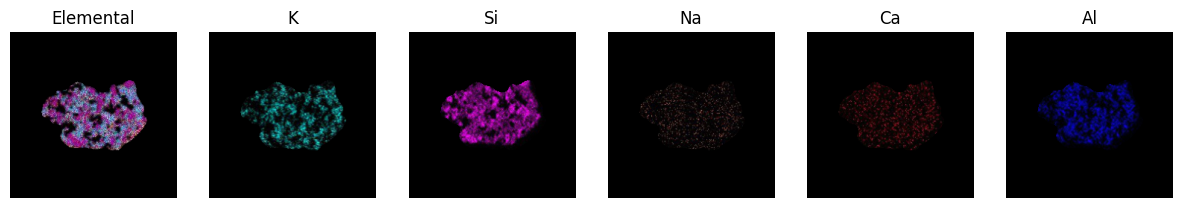

In [2]:
# Example usage:
image_paths = [
    'Aligned/USU-4183B 250-355 Elemental Map/USU-4183B 250-355 Elemental Map_aligned.png',
    'Aligned/USU-4183B 250-355 Elemental Map/USU-4183B 250-355 K Map_aligned.png',
    'Aligned/USU-4183B 250-355 Elemental Map/USU-4183B 250-355 Si Map_aligned.png',
    'Aligned/USU-4183B 250-355 Elemental Map/USU-4183B 250-355 Na Map_aligned.png',
    'Aligned/USU-4183B 250-355 Elemental Map/USU-4183B 250-355 Ca Map_aligned.png',
    'Aligned/USU-4183B 250-355 Elemental Map/USU-4183B 250-355 Al Map_aligned.png'
]

json_path = 'Seg_Images/USU-4183B 250-355 Elemental Map_aligned/USU-4183B 250-355 Elemental Map_aligned.json'

# Create an instance of the ImageSegmenter class
segmenter = ImageSegmenter(json_path, image_paths)

# Specify the mask index you want to retrieve
mask_index = 66  # Change this to the desired mask index

# Extract the segment from all the images
segments = segmenter.extract_segment_from_images(mask_index)

# Display the extracted segments
segmenter.display_segments(segments)

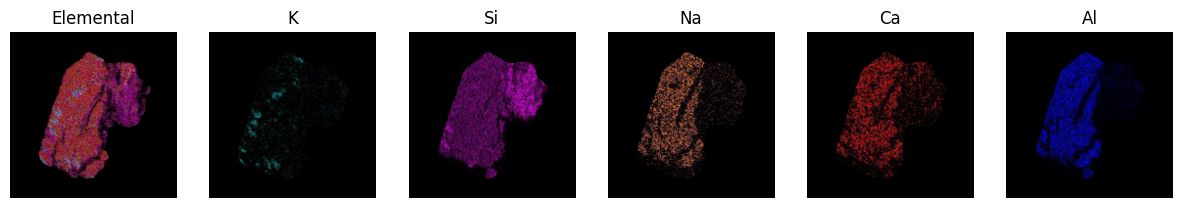

In [3]:
# Specify the mask index you want to retrieve
mask_index = 69  # Change this to the desired mask index

# Extract the segment from all the images
segments = segmenter.extract_segment_from_images(mask_index)

# Display the extracted segments
segmenter.display_segments(segments)

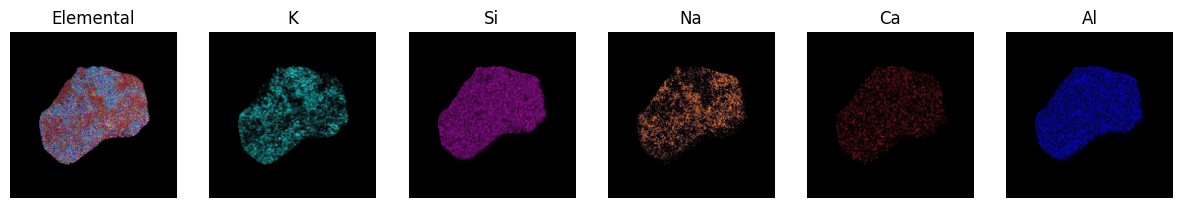

In [4]:
# Specify the mask index you want to retrieve
mask_index = 12  # Change this to the desired mask index

# Extract the segment from all the images
segments = segmenter.extract_segment_from_images(mask_index)

# Display the extracted segments
segmenter.display_segments(segments)

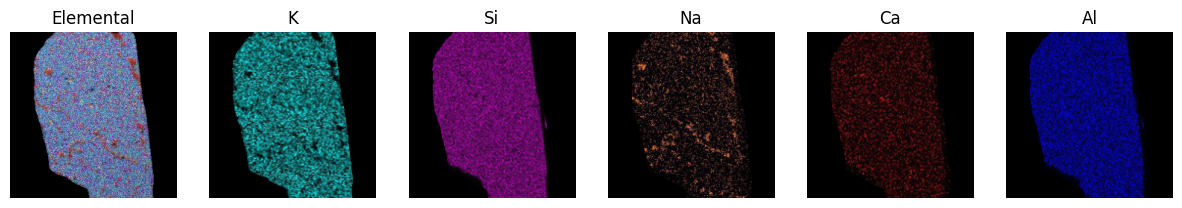

In [5]:
# Specify the mask index you want to retrieve
mask_index = 11  # Change this to the desired mask index

# Extract the segment from all the images
segments = segmenter.extract_segment_from_images(mask_index)

# Display the extracted segments
segmenter.display_segments(segments)